# Data Understanding

In [223]:
%pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [224]:

import warnings
warnings.filterwarnings('ignore')

In [225]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [226]:
%pip install xgboost lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [227]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [228]:
import pandas as pd
# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('Data Set Diabetes.csv', delimiter=';')

styled_df = df.head(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


**Tampilkan 5 data pertama dengan styling**

In [229]:
styled_df = df.head(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


**Informasi dasar dataset**

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Ukuran dataset**

In [231]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 768 
Number of Columns : 9


In [232]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [233]:
df.columns = df.columns.str.strip() 

**Periksa nilai nol**

In [234]:
# Check and clean column names
print(df.columns)
df.columns = df.columns.str.strip()

column_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in column_zero:
    if col in df.columns:
        print(f'Jumlah nilai 0 di kolom {col}: {sum(df[col] == 0)}')
    else:
        print(f"Kolom '{col}' tidak ditemukan di DataFrame.")

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Jumlah nilai 0 di kolom Glucose: 5
Jumlah nilai 0 di kolom BloodPressure: 35
Jumlah nilai 0 di kolom SkinThickness: 227
Jumlah nilai 0 di kolom Insulin: 374
Jumlah nilai 0 di kolom BMI: 11


**Statistik deskriptif dengan styling**

In [235]:
styled_df = df.describe().style \
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#254E58'),
            ('color', 'white'),
            ('font-weight', 'bold'),
            ('text-align', 'left'),
            ('padding', '8px')]
        },
        {'selector': 'td', 'props': [
            ('padding', '8px'),
            ('color', '#333333')]  # warna font sel isi
        }
    ]) \
    .set_properties(**{
        'font-size': '14px',
        'background-color': '#F5F5F5',
        'color': '#333333',  # warna font default
        'border-collapse': 'collapse',
        'margin': '10px'
    })

# Tampilkan styled DataFrame
styled_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preparation

Ganti 0 dengan NaN

In [236]:
import numpy as np

for col in column_zero:
    df[col] = df[col].replace(0, np.nan)

**Cek missing values**

In [237]:
print("Jumlah missing values per kolom:")
print(df.isnull().sum())
print("Persentase missing values per kolom (%):")
print((df.isnull().mean() * 100).round(2))
print("Jumlah baris dengan minimal 1 missing value:")
print(df.isnull().any(axis=1).sum())

Jumlah missing values per kolom:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Persentase missing values per kolom (%):
Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64
Jumlah baris dengan minimal 1 missing value:
376


In [238]:
df.drop(columns=['Insulin', 'SkinThickness'], inplace=True)

In [239]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Isi missing value dengan madian kolom

In [240]:
df.fillna(df.median(), inplace=True)

Pisahkan fitur dan target

In [241]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

# Modelling

Split data train-test 80:20

In [242]:
X_train, X_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Inisialisasi model Naive Bayes**

In [243]:
model = GaussianNB()

**Latih model**

In [244]:
model.fit(X_train, y_train)

GaussianNB()

# Evaluation

**Prediksi data test**

In [245]:
y_pred = model.predict(X_test)

**Tampilkan hasil evaluasi**

In [246]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report\n", classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



**Deployment**

In [247]:
import joblib

# Simpan model ke file
joblib.dump(model, 'naive_bayes_diabetes_model.pkl')
print("Model tersimpan sebagai 'naive_bayes_diabetes_model.pkl'")

Model tersimpan sebagai 'naive_bayes_diabetes_model.pkl'


In [248]:
%pip install pyngrok

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!ngrok config add-authtoken 2x7AjWOyQHJ2mZmNXK6Dj84fjHI_BnPLhZuVowk7yiK3b5vh

Authtoken saved to configuration file: C:\Users\fakhr\AppData\Local/ngrok/ngrok.yml


In [250]:
%pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [251]:
import streamlit as st

In [252]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']


2025-06-08 22:23:24.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.420 No runtime found, using MemoryCacheStorageManager
2025-06-08 22:23:24.421 No runtime found, using MemoryCacheStorageManager
2025-06-08 22:23:24.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2025-06-08 22:23:24.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 22:23:24.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

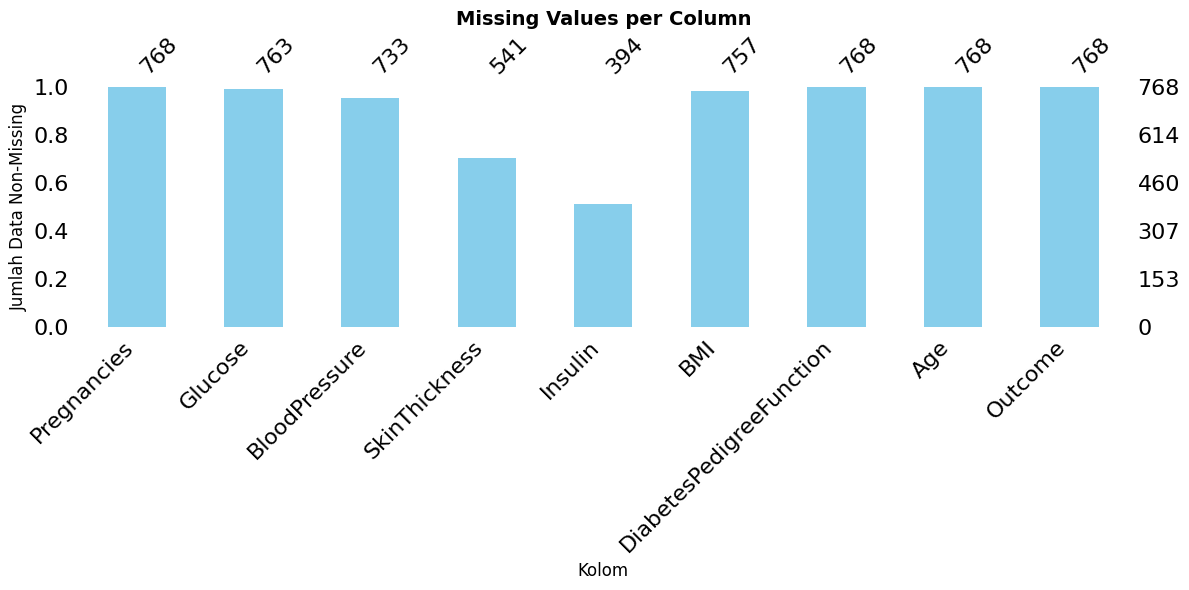

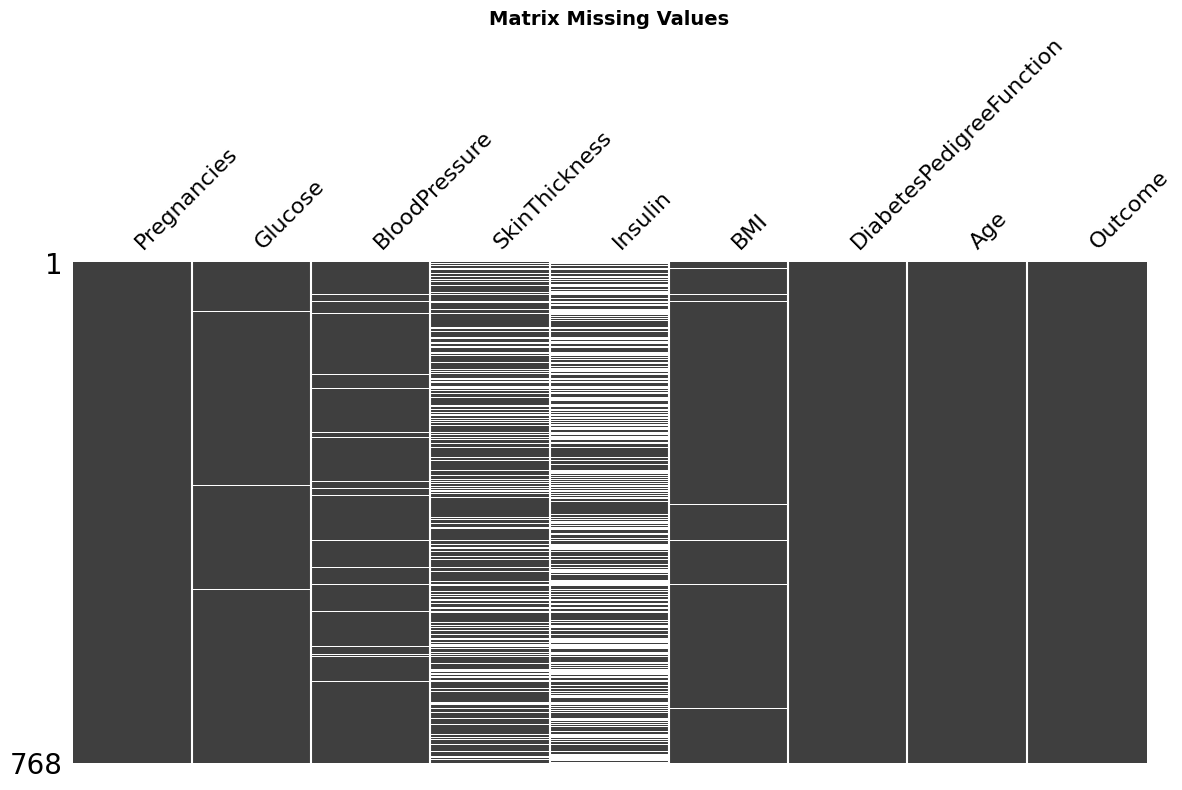

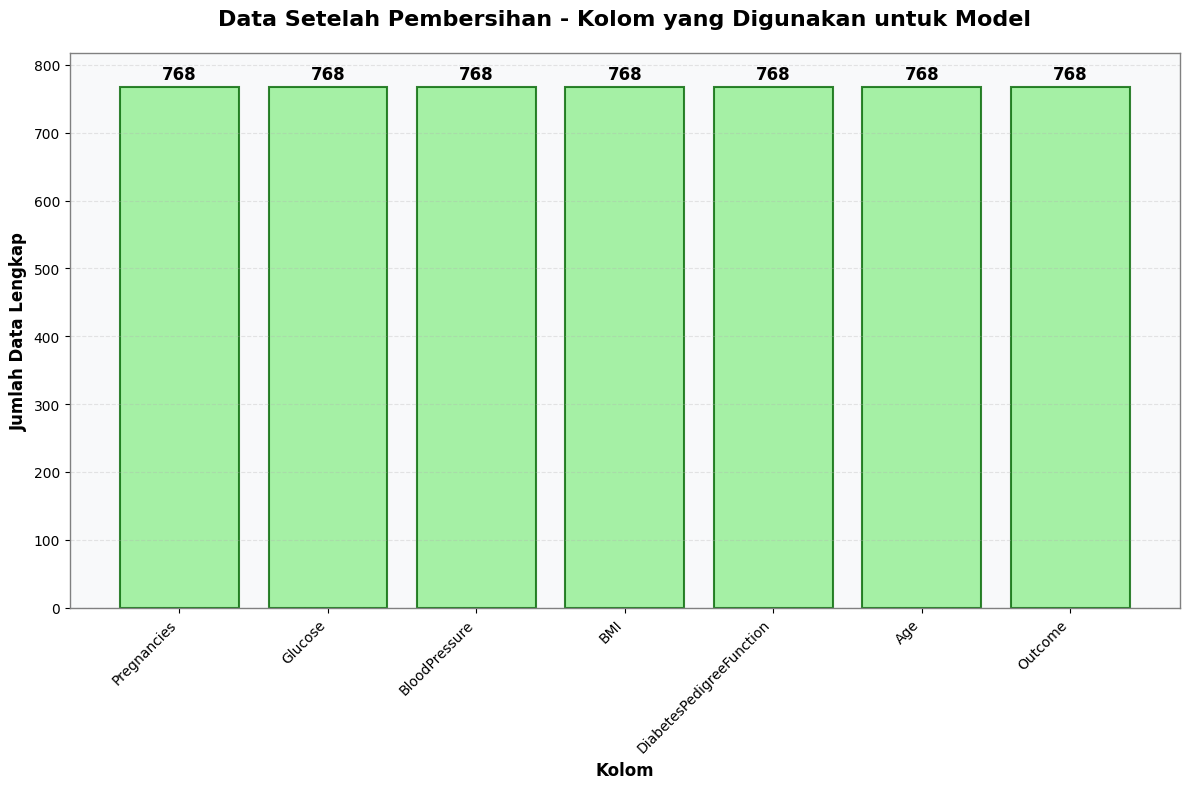

In [253]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import roc_curve, auc

st.set_page_config(page_title="Prediksi Diabetes", page_icon="🩺", layout="wide")

@st.cache_data
def load_raw_data():
    """Load data mentah untuk visualisasi missing values"""
    df = pd.read_csv("Data Set Diabetes.csv", delimiter=";")
    df.columns = df.columns.str.strip()
    # Ganti 0 dengan NaN untuk kolom tertentu
    for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
        df[col] = df[col].replace(0, np.nan)
    return df

@st.cache_data
def load_processed_data():
    """Load data yang sudah diproses untuk model"""
    df = pd.read_csv("Data Set Diabetes.csv", delimiter=";")
    df.columns = df.columns.str.strip()
    # Ganti 0 dengan NaN untuk kolom tertentu
    for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
        df[col] = df[col].replace(0, np.nan)
    # Hapus kolom Insulin dan SkinThickness
    df = df.drop(['Insulin', 'SkinThickness'], axis=1)
    # Isi NaN dengan median kolom yang tersisa
    df.fillna(df.median(numeric_only=True), inplace=True)
    return df

@st.cache_resource
def load_model():
    return joblib.load("naive_bayes_diabetes_model.pkl")

def plot_roc_curve(model, df):
    X = df[["Pregnancies", "Glucose", "BloodPressure", 
            "BMI", "DiabetesPedigreeFunction", "Age"]]
    y = df["Outcome"]

    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc="lower right")
    return fig

def show_missing_values(df_raw):
    """Menampilkan missing values dari data mentah"""
    st.subheader("📊 Informasi Missing Values")
    
    # Hitung persentase missing values
    missing_counts = df_raw.isnull().sum()
    missing_percentages = (missing_counts / len(df_raw)) * 100
    
    # Tampilkan tabel missing values
    missing_info = pd.DataFrame({
        'Kolom': missing_counts.index,
        'Jumlah Missing': missing_counts.values,
        'Persentase Missing': missing_percentages.values
    })
    missing_info = missing_info[missing_info['Jumlah Missing'] > 0]
    
    if not missing_info.empty:
        st.write("**Tabel Missing Values:**")
        st.dataframe(missing_info)
    else:
        st.info("Tidak ada missing values dalam dataset.")
    
    # Visualisasi missing values
    st.subheader("📉 Visualisasi Missing Values")
    
    if missing_counts.sum() > 0:
        fig, ax = plt.subplots(figsize=(12, 6))
        msno.bar(df_raw, ax=ax, color='skyblue')
        ax.set_title('Missing Values per Column', fontsize=14, fontweight='bold')
        ax.set_xlabel('Kolom', fontsize=12)
        ax.set_ylabel('Jumlah Data Non-Missing', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        st.pyplot(fig)
        
        # Matrix plot untuk melihat pola missing values
        st.subheader("🔍 Pola Missing Values")
        fig2, ax2 = plt.subplots(figsize=(12, 8))
        msno.matrix(df_raw, ax=ax2)
        ax2.set_title('Matrix Missing Values', fontsize=14, fontweight='bold')
        plt.tight_layout()
        st.pyplot(fig2)
    else:
        st.info("Tidak ada missing values untuk divisualisasikan.")

def show_cleaned_data_analysis(df_raw, df_processed):
    """Menampilkan analisis data yang sudah dibersihkan"""
    st.subheader("✨ Analisis Data Setelah Pembersihan")
    
    # Hitung statistik perbandingan
    missing_before = df_raw.isnull().sum().sum()
    missing_after = df_processed.isnull().sum().sum()
    
    # Metrics perbandingan
    col1, col2, col3, col4 = st.columns(4)
    with col1:
        st.metric("Missing Values Sebelum", missing_before)
    with col2:
        st.metric("Missing Values Sesudah", missing_after, delta=f"-{missing_before}")
    with col3:
        st.metric("Persentase Berkurang", f"{((missing_before - missing_after) / missing_before * 100):.1f}%")
    with col4:
        st.metric("Data Integrity", "100%" if missing_after == 0 else f"{((len(df_processed) - missing_after) / len(df_processed) * 100):.1f}%")
    
    # Tambahkan informasi tentang kolom yang dihapus
    st.info("ℹ️ **Catatan:** Kolom Insulin dan SkinThickness telah dihapus dari data yang diproses karena memiliki terlalu banyak missing values, namun masih ditampilkan dalam analisis missing values di atas untuk referensi.")
    
    # Diagram Data Setelah Dibersihkan - hanya kolom yang tersisa
    st.subheader("📊 Visualisasi Data Setelah Dibersihkan (Kolom yang Digunakan)")
    
    # Hitung jumlah data non-missing untuk setiap kolom yang tersisa
    non_missing_counts = len(df_processed) - df_processed.isnull().sum()
    
    # Buat bar chart menggunakan matplotlib dengan style yang sama
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Buat bar chart
    bars = ax.bar(range(len(non_missing_counts)), non_missing_counts, color='lightgreen', alpha=0.8, edgecolor='darkgreen', linewidth=1.5)
    
    # Tambahkan nilai di atas setiap bar
    for i, (bar, count) in enumerate(zip(bars, non_missing_counts)):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Kustomisasi tampilan
    ax.set_title('Data Setelah Pembersihan - Kolom yang Digunakan untuk Model', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Kolom', fontsize=12, fontweight='bold')
    ax.set_ylabel('Jumlah Data Lengkap', fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(non_missing_counts)))
    ax.set_xticklabels(non_missing_counts.index, rotation=45, ha='right')
    
    # Set y-axis untuk menampilkan skala yang tepat
    ax.set_ylim(0, len(df_processed) + 50)
    
    # Tambahkan grid untuk memudahkan pembacaan
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Tambahkan background color
    ax.set_facecolor('#f8f9fa')
    
    # Tambahkan border
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)
    
    plt.tight_layout()
    st.pyplot(fig)
    
    # Tampilkan informasi tambahan
    st.success(f"✅ **Data yang digunakan telah dibersihkan!** Model menggunakan {len(df_processed.columns)-1} fitur dengan {len(df_processed)} data lengkap.")
    
    # Tambahkan informasi detail pembersihan
    st.subheader("🔧 Detail Proses Pembersihan")
    
    # Tabel perbandingan sebelum dan sesudah
    comparison_data = []
    for col in df_raw.columns:
        missing_before = df_raw[col].isnull().sum()
        if col in df_processed.columns:
            missing_after = df_processed[col].isnull().sum()
            status = '✅ Dibersihkan' if missing_before > 0 else '✅ Sudah Bersih'
        else:
            missing_after = '-'
            status = '🗑️ Dihapus (Terlalu Banyak Missing)'
        
        comparison_data.append({
            'Kolom': col,
            'Missing Sebelum': missing_before,
            'Missing Sesudah': missing_after,
            'Status': status
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    st.dataframe(comparison_df, use_container_width=True)
    
    # Visualisasi perbandingan distribusi data
    st.subheader("📈 Perbandingan Distribusi Data")
    
    # Pilih kolom untuk visualisasi (hanya yang tersisa setelah preprocessing)
    remaining_numeric_cols = ['Glucose', 'BloodPressure', 'BMI']
    selected_col = st.selectbox("Pilih kolom untuk perbandingan distribusi:", remaining_numeric_cols)
    
    # Buat subplot untuk perbandingan
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Data Mentah (dengan Missing Values)', 'Data Setelah Dibersihkan'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    # Histogram data mentah (tanpa missing values untuk visualisasi)
    raw_data_clean = df_raw[selected_col].dropna()
    fig.add_trace(
        go.Histogram(x=raw_data_clean, name="Data Mentah", 
                    marker_color='lightblue', opacity=0.7, nbinsx=30),
        row=1, col=1
    )
    
    # Histogram data yang sudah dibersihkan
    fig.add_trace(
        go.Histogram(x=df_processed[selected_col], name="Data Dibersihkan", 
                    marker_color='lightgreen', opacity=0.7, nbinsx=30),
        row=1, col=2
    )
    
    fig.update_layout(
        title_text=f"Perbandingan Distribusi {selected_col}",
        showlegend=False,
        height=400
    )
    fig.update_xaxes(title_text=selected_col)
    fig.update_yaxes(title_text="Frekuensi")
    
    st.plotly_chart(fig, use_container_width=True)
    
    # Statistik deskriptif perbandingan
    st.subheader("📈 Statistik Deskriptif Perbandingan")
    
    col1, col2 = st.columns(2)
    
    with col1:
        st.write("**Data Mentah (dengan missing values):**")
        stats_raw = df_raw[remaining_numeric_cols + ['Pregnancies', 'DiabetesPedigreeFunction', 'Age']].describe()
        st.dataframe(stats_raw)
    
    with col2:
        st.write("**Data Setelah Dibersihkan:**")
        stats_processed = df_processed[remaining_numeric_cols + ['Pregnancies', 'DiabetesPedigreeFunction', 'Age']].describe()
        st.dataframe(stats_processed)
    
    # Visualisasi heatmap korelasi
    st.subheader("🔥 Heatmap Korelasi Data Bersih")
    
    # Hitung korelasi (hanya kolom yang tersisa)
    corr_matrix = df_processed[remaining_numeric_cols + ['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr()
    
    # Buat heatmap menggunakan plotly
    fig_heatmap = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        colorscale='RdBu',
        zmid=0,
        text=np.round(corr_matrix.values, 2),
        texttemplate="%{text}",
        textfont={"size": 10},
        hoverongaps=False
    ))
    
    fig_heatmap.update_layout(
        title="Korelasi Antar Variabel (Data Bersih)",
        width=800,
        height=600
    )
    
    st.plotly_chart(fig_heatmap, use_container_width=True)
    
    # Box plot untuk deteksi outliers
    st.subheader("📦 Box Plot - Deteksi Outliers (Data Bersih)")
    
    selected_cols_box = st.multiselect(
        "Pilih kolom untuk box plot:",
        remaining_numeric_cols,
        default=remaining_numeric_cols[:2]
    )
    
    if selected_cols_box:
        fig_box = go.Figure()
        
        for col in selected_cols_box:
            fig_box.add_trace(go.Box(
                y=df_processed[col],
                name=col,
                boxpoints='outliers'
            ))
        
        fig_box.update_layout(
            title="Box Plot - Deteksi Outliers",
            yaxis_title="Nilai",
            height=500
        )
        
        st.plotly_chart(fig_box, use_container_width=True)

# Load data mentah dan yang sudah diproses
df_raw = load_raw_data()
df_processed = load_processed_data()
model = load_model()

st.title("Dashboard Prediksi Diabetes 🩺")
st.markdown("Prediksi kemungkinan diabetes berdasarkan data medis menggunakan model Naive Bayes.")

# Tambahkan tab untuk memisahkan prediksi dan analisis data
tab1, tab2, tab3 = st.tabs(["🔮 Prediksi", "📊 Analisis Missing Values", "✨ Data Bersih & Visualisasi"])

with tab1:
    col1, col2 = st.columns(2)
    with col1:
        pregnancies = st.slider("Pregnancies", int(df_processed.Pregnancies.min()), int(df_processed.Pregnancies.max()), int(df_processed.Pregnancies.mean()))
        glucose = st.slider("Glucose", int(df_processed.Glucose.min()), int(df_processed.Glucose.max()), int(df_processed.Glucose.mean()))
        bp = st.slider("BloodPressure", int(df_processed.BloodPressure.min()), int(df_processed.BloodPressure.max()), int(df_processed.BloodPressure.mean()))

    with col2:
        bmi = st.slider("BMI", float(df_processed.BMI.min()), float(df_processed.BMI.max()), float(df_processed.BMI.mean()))
        dpf = st.slider("DiabetesPedigreeFunction", float(df_processed.DiabetesPedigreeFunction.min()), float(df_processed.DiabetesPedigreeFunction.max()), float(df_processed.DiabetesPedigreeFunction.mean()))
        age = st.slider("Age", int(df_processed.Age.min()), int(df_processed.Age.max()), int(df_processed.Age.mean()))

    # Pastikan input_df sesuai urutan & nama kolom saat training (tanpa Insulin dan SkinThickness)
    feature_names = ["Pregnancies", "Glucose", "BloodPressure", 
                     "BMI", "DiabetesPedigreeFunction", "Age"]
    input_df = pd.DataFrame([[pregnancies, glucose, bp, bmi, dpf, age]], columns=feature_names)

    if st.button("Prediksi"):
        prediction = model.predict(input_df)[0]
        probability = model.predict_proba(input_df)[0]

        st.subheader("🔍 Hasil Prediksi")
        if prediction == 1:
            st.error(f"🩸 Diabetes dengan probabilitas {probability[1]:.2%}")
        else:
            st.success(f"✅ Tidak Diabetes dengan probabilitas {probability[0]:.2%}")

        st.plotly_chart(
            go.Figure(data=[go.Bar(x=["Tidak Diabetes", "Diabetes"], y=probability, marker_color=['blue', 'red'])])
            .update_layout(title="Probabilitas Kelas", yaxis=dict(range=[0,1]))
        )

        st.pyplot(plot_roc_curve(model, df_processed))

        st.markdown("### 💡 Rekomendasi")
        if prediction == 1:
            st.markdown("- Konsultasi dengan dokter segera.\n- Pantau kadar gula darah secara rutin.")
        else:
            st.markdown("- Jaga pola makan sehat.\n- Lanjutkan gaya hidup aktif.")

with tab2:
    st.markdown("### 📈 Analisis Dataset Mentah")
    
    # Tampilkan informasi dasar dataset
    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("Total Sampel", len(df_raw))
    with col2:
        st.metric("Jumlah Fitur", len(df_raw.columns) - 1)  # -1 untuk outcome
    with col3:
        st.metric("Total Missing Values", df_raw.isnull().sum().sum())
    
    # Visualisasi missing values menggunakan data mentah
    show_missing_values(df_raw)
    
    # Tambahan: Perbandingan sebelum dan sesudah preprocessing
    st.markdown("---")
    st.subheader("⚖️ Perbandingan Data Sebelum dan Sesudah Preprocessing")
    
    col1, col2 = st.columns(2)
    with col1:
        st.write("**Data Mentah (dengan missing values):**")
        st.write(f"Total missing values: {df_raw.isnull().sum().sum()}")
        st.dataframe(df_raw.head())
    
    with col2:
        st.write("**Data Setelah Preprocessing:**")
        st.write(f"Total missing values: {df_processed.isnull().sum().sum()}")
        st.dataframe(df_processed.head())

with tab3:
    # Tampilkan analisis data yang sudah dibersihkan
    show_cleaned_data_analysis(df_raw, df_processed)

In [254]:
from pyngrok import ngrok
import threading
import os
def run_streamlit():
  os.system("streamlit run app.py --server.port 8501")
thread = threading.Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(addr='8501')
print(public_url)

t=2025-06-08T22:23:31+0700 lvl=warn msg="failed to check for update" obj=updater err="Post \"https://update.equinox.io/check\": context deadline exceeded"
t=2025-06-08T22:23:36+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: i/o timeout"
t=2025-06-08T22:23:47+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="failed to send authentication request: failed to fetch CRL. errors encountered: timed out fetching CRL"


PyngrokNgrokError: The ngrok process errored on start: failed to send authentication request: failed to fetch CRL. errors encountered: timed out fetching CRL.